<a href="https://colab.research.google.com/github/rupeshpatro2001/Playstore-Data-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

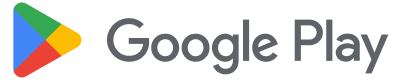

In today’s world mobile applications find their utter usefulness because specific software is required for almost every purpose be it personal, social, business & for any such functions. The android OS platform has a market share of 71% (Sept 2022) which means there’s huge potential for app developer in this market. 

The Google Play Store is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system and its derivatives as well as ChromeOS, allowing the users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play store allows access to download a wide range of apps, books, movies, and television Content either free of charge or at a cost. 
(**Source:https://en.wikipedia.org/wiki/Google_Play#Movies_and_TV_shows**)

It is important for every developer to understand the needs of the user so that the developer can devlop, update or modify the application. The application not only engages the user with We are provided with two data sets which consits of the application information and the other data sets which contains the user reviews for the application and the result from the sentiment analysis.

In [1]:
#importing all the libraries required for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')  
from wordcloud import WordCloud, STOPWORDS 
%matplotlib inline


Mounted at /content/drive


In [2]:
#importing the data
file_path = '/content/drive/MyDrive/project/Play Store Data.csv'
df=pd.read_csv(file_path)
user_review=pd.read_csv('/content/drive/MyDrive/project/User Reviews.csv')

#1. Data Understanding
We need to look the data first in order to process the data 

In [3]:
#checking the head of the data
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#checking the tail of the data
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

The App Data set is of dimention 10841x13. The coloums consists of following 
data:
1. **App**: The name of the application
2. **Category**: The category to which the app belongs
3. **Rating**: The rating of the application out of 5.
4. **Reviews**: The user reviews given to the application
5. **Size**: Size of the application.
6. **Installs**: Number of installations across the devices.
7. **Type**: Free or Paid
8. **Prices**: Price of application in dollars.
9. **Content** Rating: Age based application use.
10. **Genres**: Types of genere an application belongs.
11. **Last Updated**: Most recent update to the application.
12. **Current Ver**: The most recent version of the application.
13. **Android Ver**: The minimum device android version needed to install

#2.Data Cleaning
##Removing Duplicates values from the data set




In [8]:
df.drop_duplicates().reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


###Now working with the user review data

In [9]:
#Checking the head of the data
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [10]:
#Checking the tail of the data
user_review.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [11]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [12]:
user_review.drop_duplicates().reset_index()

,index,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...,...
30674,64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
30675,64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
30676,64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
30677,64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


In [13]:
user_review.dropna(inplace=True)
user_review.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

The user data consits of user reviews for the applications and based on it sentiment analysis is done. The user data has following columns:
1. **App**: The name of the application
2. **Translated_Review**: The review provided by the user to the application
3. **Sentiment**: The sentiment of the user based on the review (positive, negative or neutral.
4. **Sentiment_Polarity**: How strongly the user is converying the message, it may be positve or negative(strongly or sligtly.
5. **Sentiment_Subjectiviity**:It refers to the degree to which a person is personally involved in an object. It may be positive or negative.


In [14]:
user_review.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261587
Sentiment_Subjectivity,0.261587,1.000000


In [15]:
updated_review=user_review.groupby('App').mean().reset_index()
updated_review

,App,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,0.470733,0.495455
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
2,11st,0.185943,0.455340
3,1800 Contacts - Lens Store,0.318145,0.591098
4,1LINE – One Line with One Touch,0.196290,0.557315
...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,0.101622,0.545444
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
862,Hotstar,0.038178,0.493964
863,Hotwire Hotel & Car Rental App,0.187029,0.459717


In [16]:
# Inspecting the sentiment column
user_review['Sentiment'].value_counts()


Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [17]:
user_review['Sentiment_Polarity'].value_counts()

 0.000000    5158
 0.500000    1524
 0.700000     991
 1.000000     959
 0.800000     639
             ... 
-0.072024       1
 0.452000       1
 0.076190       1
-0.067256       1
 0.173333       1
Name: Sentiment_Polarity, Length: 5410, dtype: int64

In [18]:
user_review[user_review['Sentiment'] == 'Positive'].head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [19]:
user_review[user_review['Sentiment'] == 'Negative'].head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


In [20]:
user_review[user_review['Sentiment'] == 'Neutral'].head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
22,10 Best Foods for You,God health,Neutral,0.0,0.0
25,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
29,10 Best Foods for You,On test....,Neutral,0.0,0.0


In [21]:
user_review.groupby('App')['Sentiment'].value_counts()

App                               Sentiment
10 Best Foods for You             Positive     162
                                  Neutral       22
                                  Negative      10
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室  Positive      31
                                  Neutral        8
                                              ... 
Hotwire Hotel & Car Rental App    Neutral       11
                                  Negative       6
Housing-Real Estate & Property    Negative      10
                                  Positive       8
                                  Neutral        3
Name: Sentiment, Length: 2376, dtype: int64

In [22]:
# positive reviews

positive_reviews_df = user_review[user_review['Sentiment'] == 'Positive']
positive_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


In [23]:
negative_reviews_df =user_review[user_review['Sentiment'] == 'Negative']
negative_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


#3. Null/Missing Value Treatment

In [24]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [25]:
df.Type[df.Type.isnull()]='Free' #info not available hence it considered that it is available for free
df['Content Rating'][df['Content Rating'].isnull()]='Everyone' #info not specified hence it is considered it it available to all
df['Current Ver'][df['Current Ver'].isna()]=1.0  #as we don't have the data and we are cosidering it the initial version of the app
df['Android Ver'][df['Android Ver'].isna()]='Varies with device' #as we don't have the data and we are cosidering that it is available for all
df['Rating'][df['Rating'].isna()]='Rating' #as we don't have the data and we are cosidering that it is available for all

df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#4. Correcting Data Type

##Merging The Data
Merging the sentiment analysis data into the main data


In [26]:
d=pd.merge(df,updated_review)
d.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.152652,0.641540
1,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.152652,0.641540
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,0.268483,0.523447
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,0.412649,0.679226
4,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up,0.283509,0.479298


In [27]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1228
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     1229 non-null   object 
 1   Category                1229 non-null   object 
 2   Rating                  1229 non-null   object 
 3   Reviews                 1229 non-null   object 
 4   Size                    1229 non-null   object 
 5   Installs                1229 non-null   object 
 6   Type                    1229 non-null   object 
 7   Price                   1229 non-null   object 
 8   Content Rating          1229 non-null   object 
 9   Genres                  1229 non-null   object 
 10  Last Updated            1229 non-null   object 
 11  Current Ver             1229 non-null   object 
 12  Android Ver             1229 non-null   object 
 13  Sentiment_Polarity      1229 non-null   float64
 14  Sentiment_Subjectivity  1229 non-null   

In [28]:
#there was problem at location 714 for the rating column, hence we are doing treatment
d.Rating[714]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
'''rating is float type but by default it is considered as an object hence we 
are converting it , same with Reviews''' 

d.Rating=pd.to_numeric(d.Rating)
d.Reviews=pd.to_numeric(d.Reviews)


In [30]:
#converting kb to mb in the size column and converting the data type
d.rename(columns = {'Size':'Size_Mb'}, inplace = True)  

for i in range(len(d.Size_Mb)): 
  if d.Size_Mb[i][-1:] == "k":
    d.Size_Mb[i]=float(d.Size_Mb[i][0:-1])/1000
  elif d.Size_Mb[i][-1:] == "M":
    d.Size_Mb[i]=d.Size_Mb[i]
    d["Size_Mb"][i]=d["Size_Mb"][i].replace('M',"")
  else:
      d.Size_Mb[i]=np.nan 
d.Size_Mb=pd.to_numeric(d.Size_Mb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7

In [31]:
#there is $ sign associated with the price hence it cannot be converted from the object, hence we are removing the $ sign
#there is + sign associated with the installs hence it cannot be converted from the object, hence we are removing the + sign

d["Price"]=d["Price"].str.replace("$","")
d["Installs"]=d["Installs"].str.replace("+","").str.replace(",","")
d.Price=pd.to_numeric(d.Price)
d.Installs=pd.to_numeric(d.Installs)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [32]:
#creating a sentiment column
d['Sentiment']=d.Sentiment_Polarity.copy()
for i in range(len(d['Sentiment'])):
  if d['Sentiment'][i] > 0:
    d['Sentiment'][i]='Positive'
  elif d['Sentiment'][i] < 0:
    d['Sentiment'][i]='Negative'
  else:
    d['Sentiment'][i]='Neutral'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
d.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_Mb', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Sentiment_Polarity', 'Sentiment_Subjectivity',
       'Sentiment'],
      dtype='object')

#5. Visualization/Insights
We have cleared the data as per our use now we have to get the insigts out of the data

# **Observation 1: The Top Apps**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top Categories on Play Store')

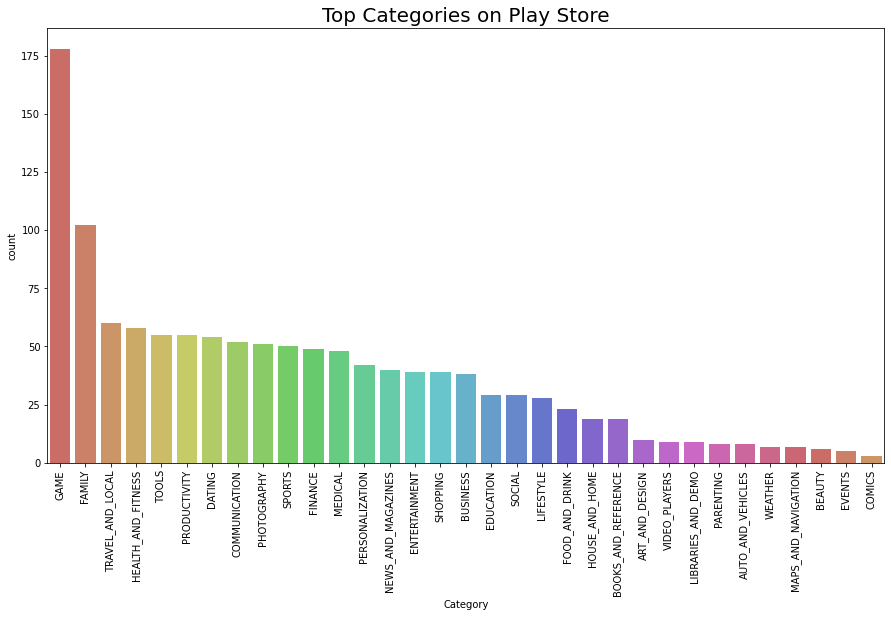

In [34]:
#checking the which categoury has the highest number of apps
plt.figure(figsize=(15,8))
sns.countplot('Category',data=d,
              order=d.Category.value_counts().index,palette=sns.color_palette("hls", 30))
plt.xticks(rotation=90)
plt.title("Top Categories on Play Store", fontsize = 20)

## **Observation 1(Cont.)**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

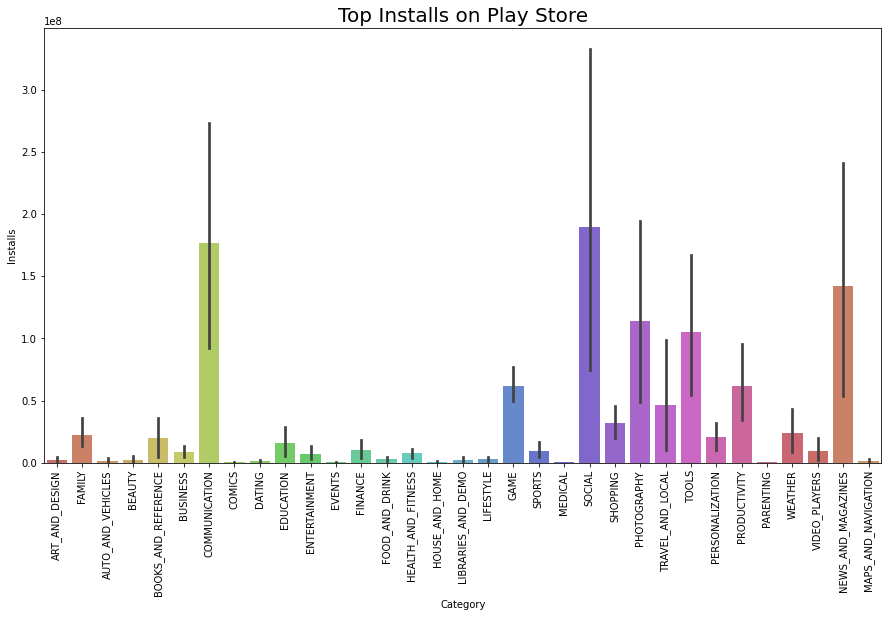

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(data=d,y='Installs',x='Category'
              ,palette=sns.color_palette("hls", 30))
plt.title("Top Installs on Play Store", fontsize = 20)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

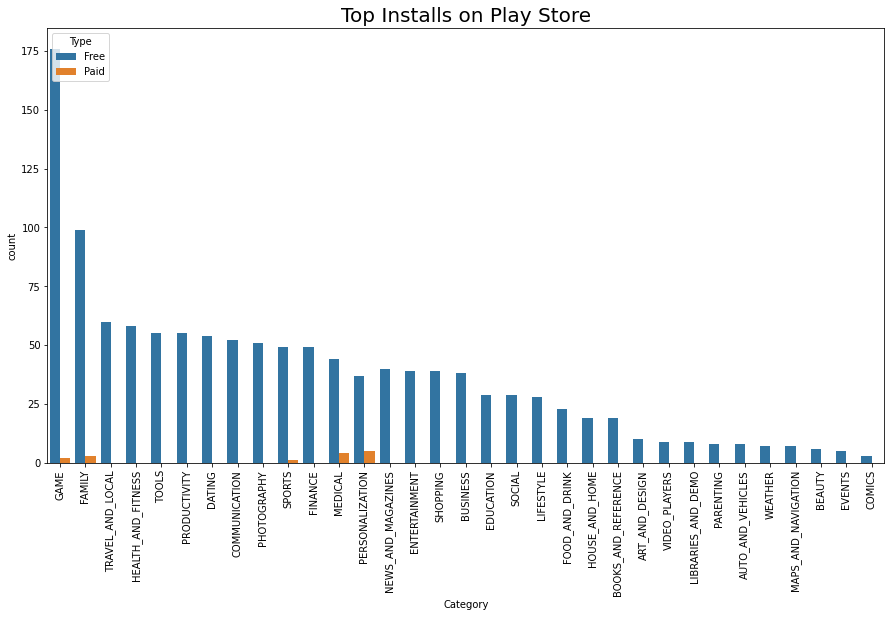

In [36]:
plt.figure(figsize=(15,8))
sns.countplot('Category',data=d,
              order=d.Category.value_counts().index,hue='Type')
plt.title("Top Installs on Play Store", fontsize = 20)
plt.xticks(rotation=90)

## **Observation 1(Cont.)**

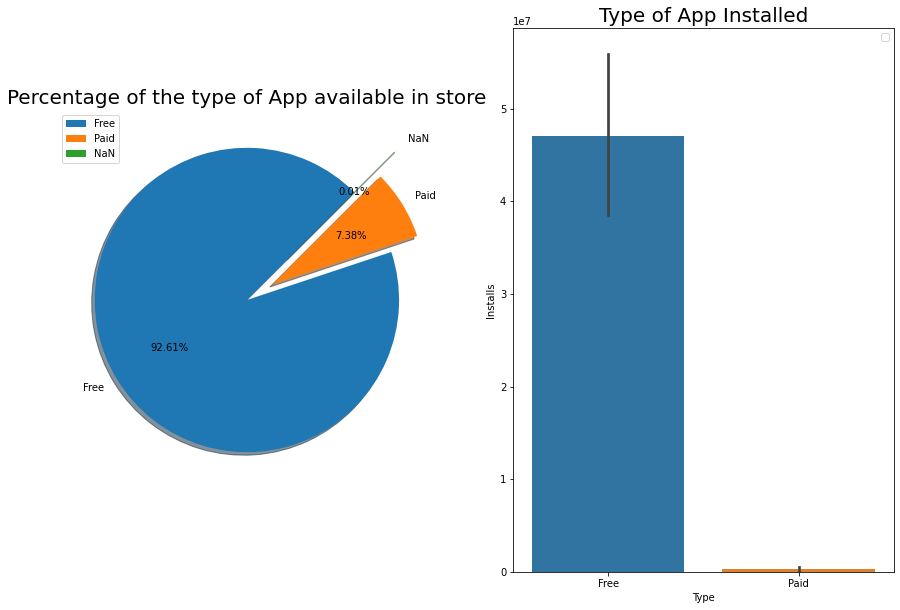

In [37]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
x=df.Type.value_counts()
label=["Free","Paid","NaN"]
plt.pie(x,labels=label,autopct="%1.2f%%",shadow=True, explode=[0, 0.2, 0.4], startangle=45)
plt.title("Percentage of the type of App available in store", fontsize = 20)
plt.legend()

plt.subplot(1, 2, 2)
sns.barplot(data=d, x='Type',y='Installs')
plt.title("Type of App Installed", fontsize = 20)
plt.legend()

Well, we got some suprising results 
 

*   Social category app are downloaded the most but they don't even contribute by a fourth to the overall apps present in the play store.

*   Communication and news/magzine closely follow the suit and are not very far behind it.

* The amount of apps present in the store not necessarily means that they are downloaded.

* There are around 8% paid apps available in app store but the users give free apps more preference    




# **Observation 2: The user rating**

let's see some other character "ratings" for which we are using violin plot and density plot that makes our analysis more interesting in visual aspects.

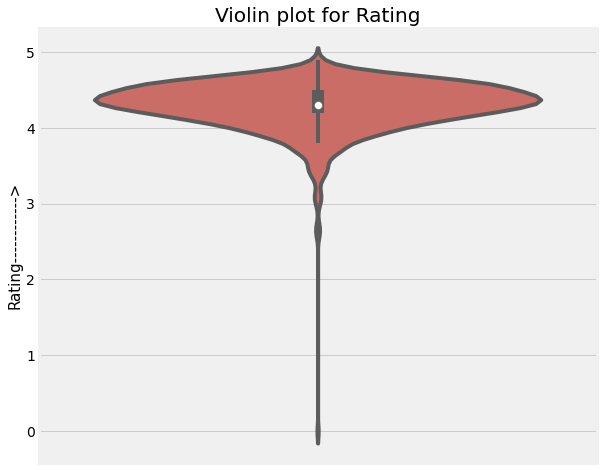

In [38]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.violinplot(y="Rating",data=d,palette=sns.color_palette("hls", 30) )
plt.ylabel("Rating------------>", fontsize=15)
plt.title("Violin plot for Rating")
plt.show();

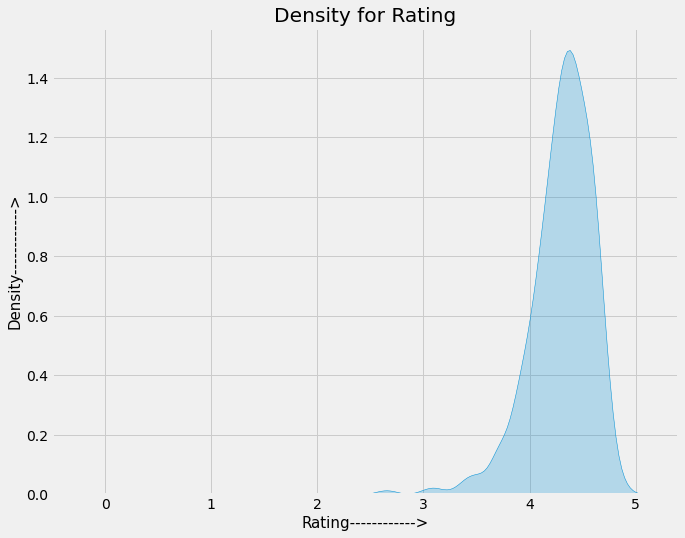

In [39]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.kdeplot(d["Rating"],palette=sns.color_palette("hls", 30),shade = True)
plt.xlabel("Rating------------>", fontsize=15)
plt.ylabel("Density------------>", fontsize=15)
plt.title("Density for Rating")
plt.show();

## **Observation 2(Cont.)**

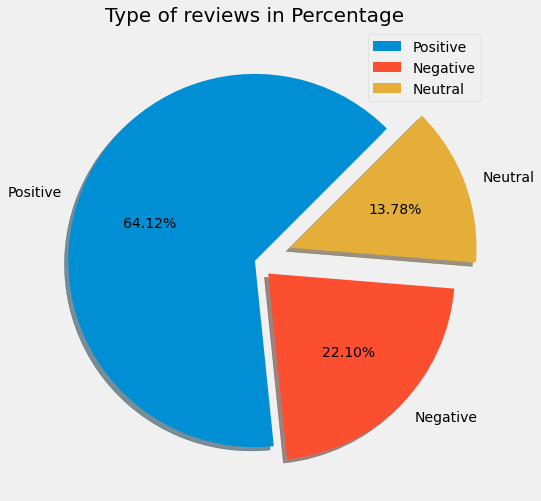

In [40]:
plt.figure(figsize=(10,8))
x=user_review['Sentiment'].value_counts()
label=["Positive","Negative","Neutral"]
plt.pie(x,labels=label,autopct="%1.2f%%",shadow=True, explode=[0, 0.1, 0.2], startangle=45)
plt.title("Type of reviews in Percentage", fontsize = 20)
plt.legend()

From our research, we found that the average volume of ratings across all app categories is between 4-4.5. Even though, almost 40% peolePeople generally rate the apps as good and very very good

The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

# **Observation 3: Type of Apps**

## **Android Version Supported Apps Across the Whole Database**

In [41]:
count_AndroidVer=pd.value_counts(df["Android Ver"], sort=True)
count_AndroidVer

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1365
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [42]:
#There are a lot of values hence combining them as one
count_AndroidVer[14]=count_AndroidVer[14:].sum()
count_AndroidVer.rename({'6.0 and up':'Others'},inplace=True)

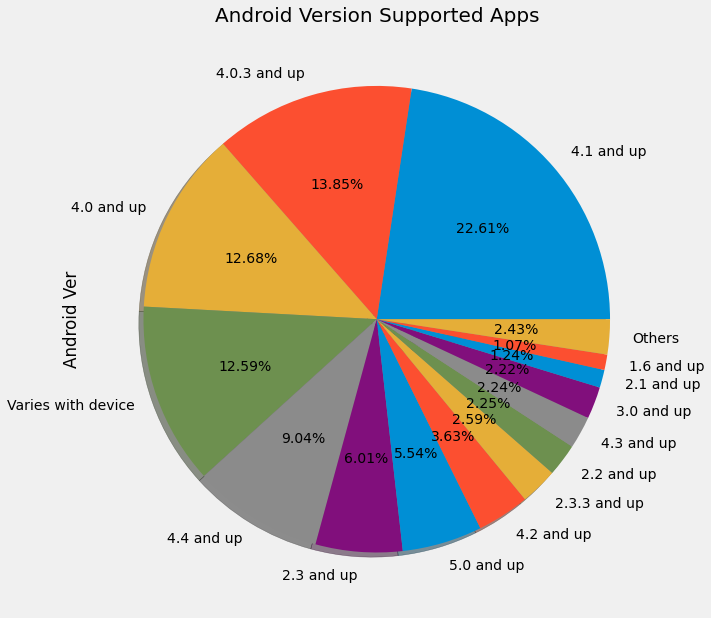

In [43]:
plt.figure(figsize=(15,10))
count_AndroidVer[0:15].plot(kind = 'pie',  autopct='%1.02f%%', shadow=True)
plt.title('Android Version Supported Apps',size=20)
plt.show()

Text(0.5, 1.0, 'Size of Apps available on Play Store')

<Figure size 1080x576 with 0 Axes>

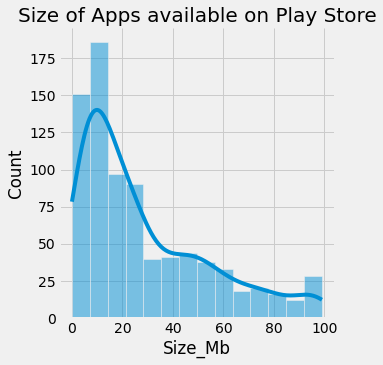

In [44]:
plt.figure(figsize=(15,8))
sns.displot(data=d, x="Size_Mb", kde=True,palette=sns.color_palette("hls",8))
plt.title("Size of Apps available on Play Store", fontsize = 20)

## **Observation 3(Cont.)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


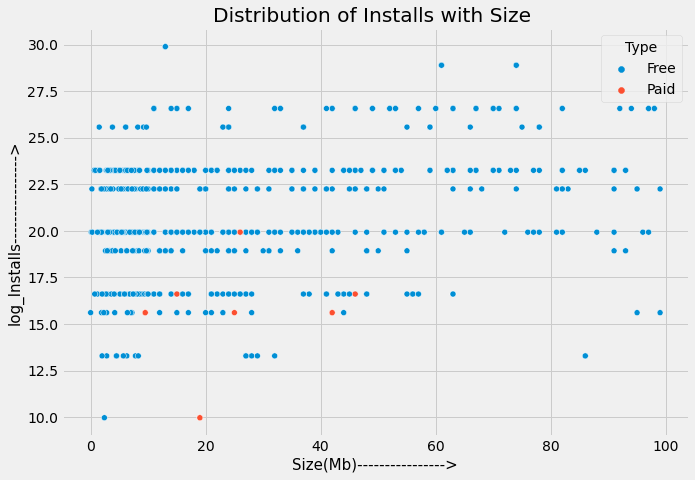

In [45]:
'''As we can notice,there is a high variance in the number of installs. 
To remove this we are adding a new column to dataframe, which is the log of number of installs'''
d['log_installs'] = np.log2(d['Installs'])
# Scatter-plot
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
sns.scatterplot(d['Size_Mb'],d['log_installs'],hue=d["Type"])
plt.xlabel("Size(Mb)---------------->",fontsize=15)
plt.ylabel("log_Installs---------------->",fontsize=15)
plt.title("Distribution of Installs with Size ")
plt.show();

## **Observation 3(Cont.)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top Genres on Play Store')

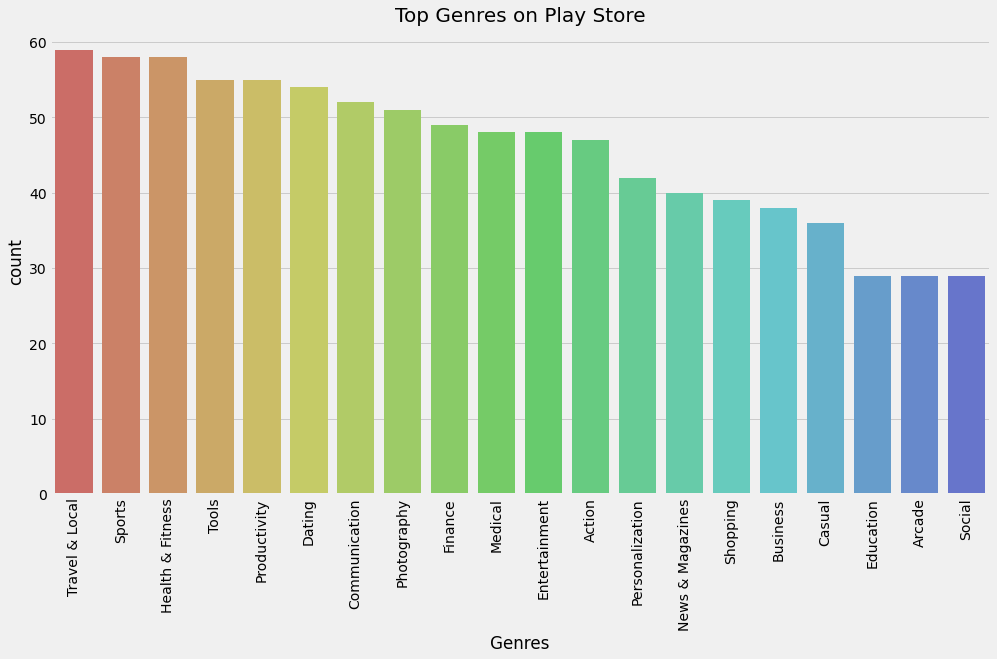

In [46]:
plt.figure(figsize=(15,8))
sns.countplot('Genres',data=d,
              order=d.Genres.value_counts().head(20).index,palette=sns.color_palette("hls",30))
plt.xticks(rotation=90)
plt.title("Top Genres on Play Store", fontsize = 20)

## **Observation 3(Cont.)**

Text(0.5, 1.0, 'Top Genres on Play Store based on installation')

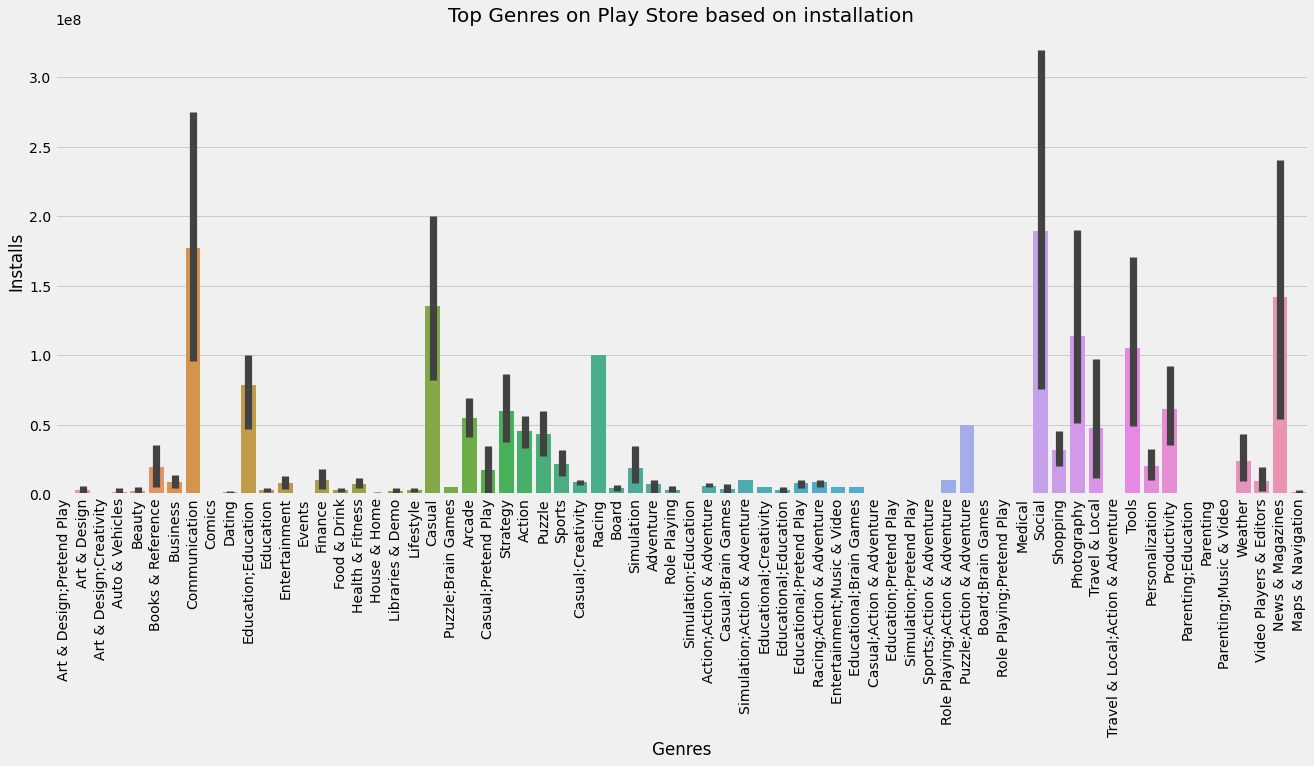

In [47]:
plt.figure(figsize=(20,8))

sns.barplot(data=d,y='Installs',x='Genres')
plt.xticks(rotation=90)
plt.title("Top Genres on Play Store based on installation", fontsize = 20)

The app store conatains almost 60-70% apps which still have support for the older devices which still have support for the older devices which means there are still older version android devices in the market. Maximum apps available in the market are generally small in size. The apps falling under the gener "Tools" are the most closely followed by "Travel and Local" and "Health & Fitness" Through the "Tools" genre have the largest chunk in the marketplace,the "Social" genre rules the marketplace in terms of downloads. The size may imapct the number of installations, bulkier applications are less likely to be installed by the user.

# **Observation 4: The user Experience-1**

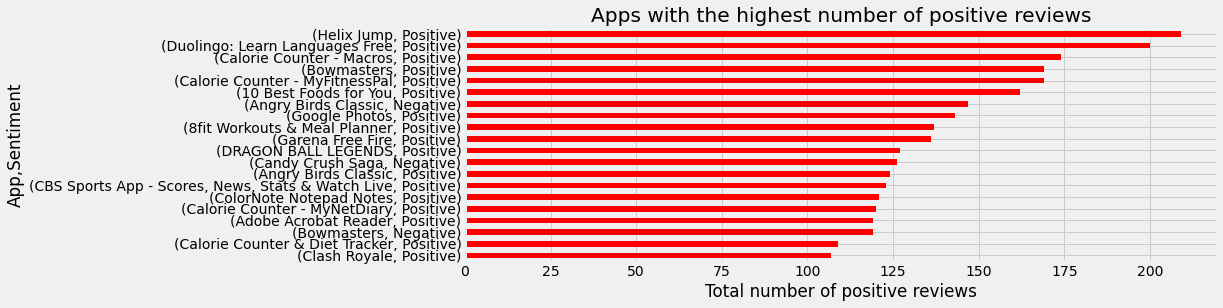

In [48]:
# positive reviews
user_review.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(12,4), color='r').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews');

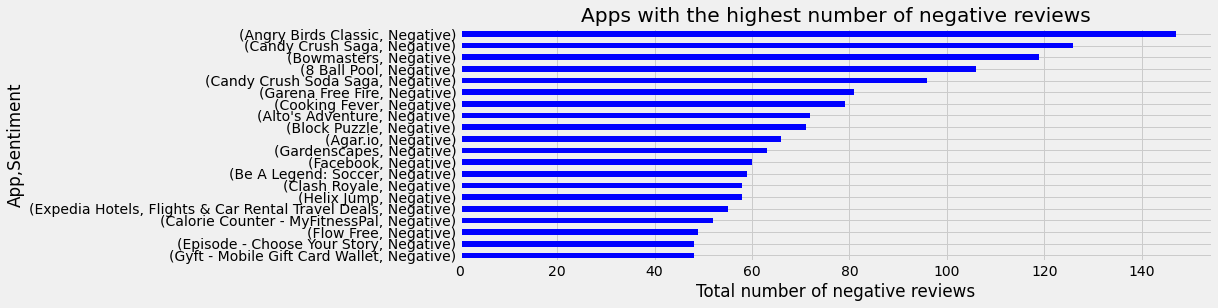

In [49]:
negative_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(12,4), color='blue').invert_yaxis()
plt.xlabel('Total number of negative reviews')
plt.title('Apps with the highest number of negative reviews');

## **Observation 4(Cont.)**

Text(0.5, 1.0, 'Install as per the Content Rating')

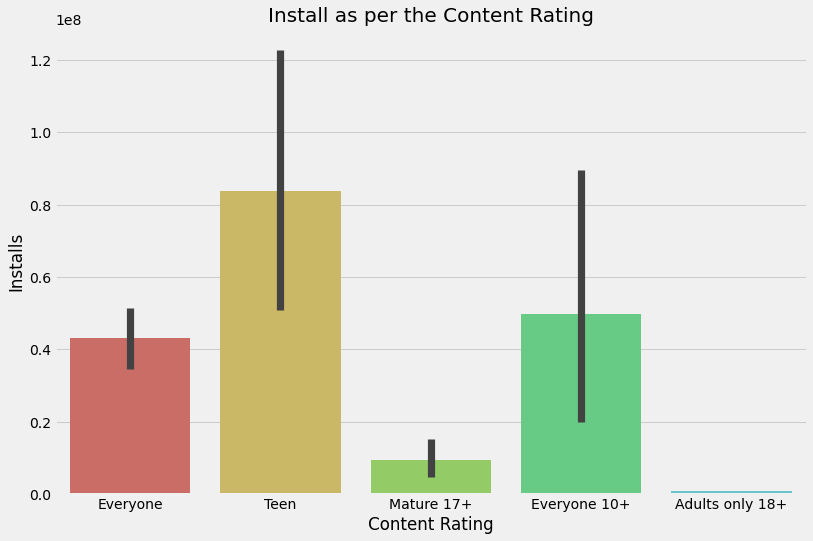

In [50]:
plt.figure(figsize=(12,8))

sns.barplot(y="Installs",x="Content Rating",data=d,palette=sns.color_palette("hls",8))
plt.title("Install as per the Content Rating", fontsize = 20)



## **Observation 4(Cont.)**

Text(0.5, 1.0, 'Relation between different parameters given for the Apps')

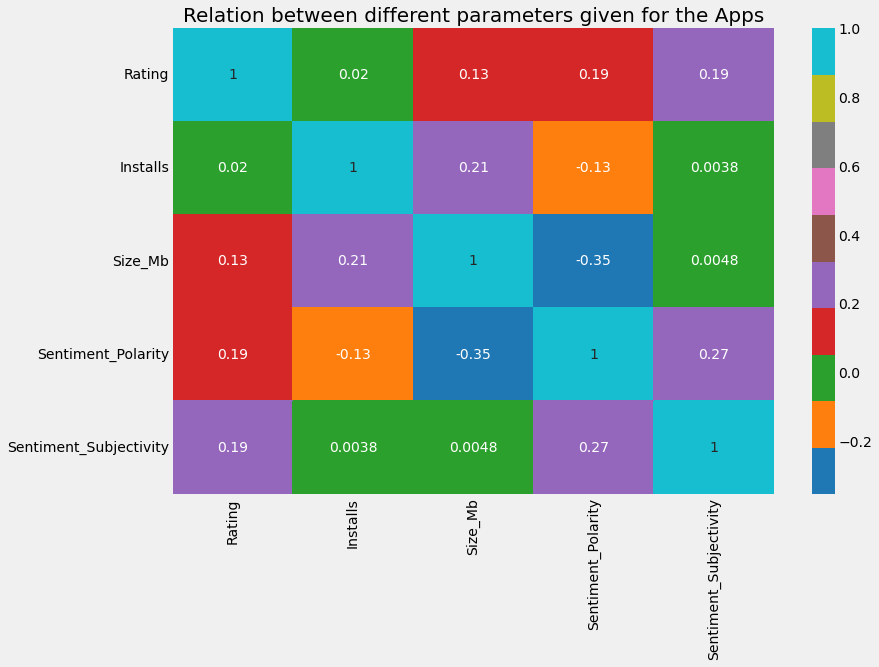

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(d[['Rating','Installs','Size_Mb','Sentiment_Polarity','Sentiment_Subjectivity']].corr(),cmap=sns.color_palette("tab10"),annot=True)
plt.title("Relation between different parameters given for the Apps", fontsize = 20)


We observed that there is a direct relation between the sentiment polarity,rating,sentiment subjectivity and installs.
If the sentiments are negative then there can be decrease in the number of installs by users.
The maximun installs is for apps which are available for 12 and above group,which constitutes to the maximum phone users.
The adult category has the least installs as it specifically caters the content to the age group.

# **Observation 5: The user Experience-2**
# **Sentiments**

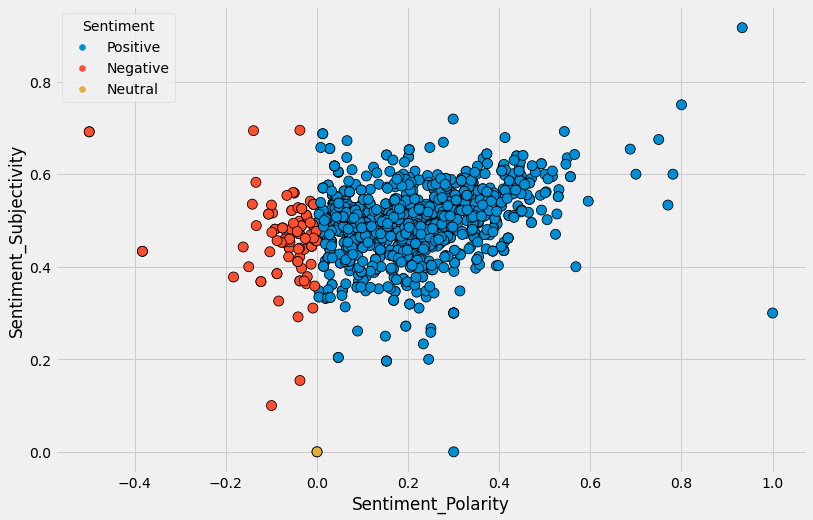

In [52]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=d,x='Sentiment_Polarity',y='Sentiment_Subjectivity',s=100,edgecolor="black", hue='Sentiment')


## **Observation 5(Cont.)**

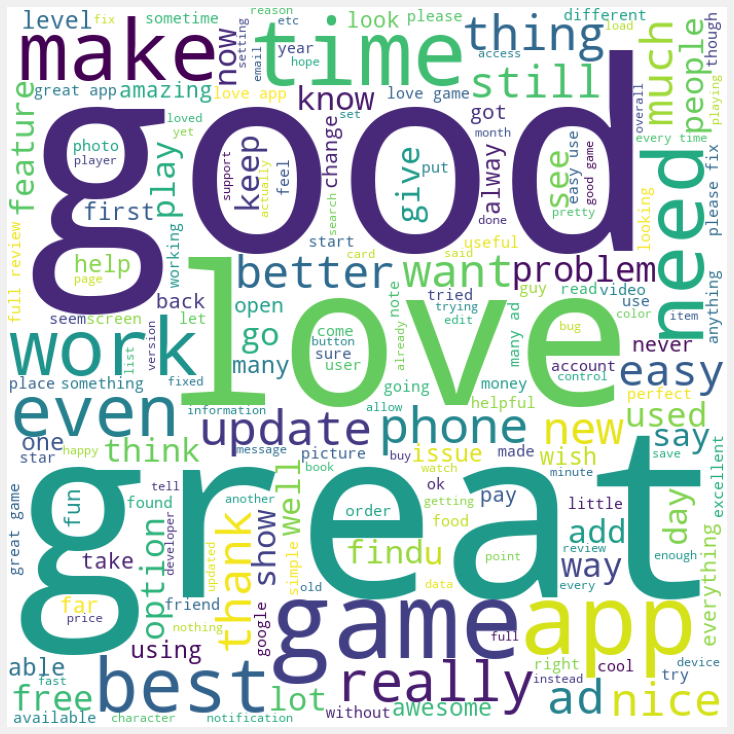

In [53]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in positive_reviews_df.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

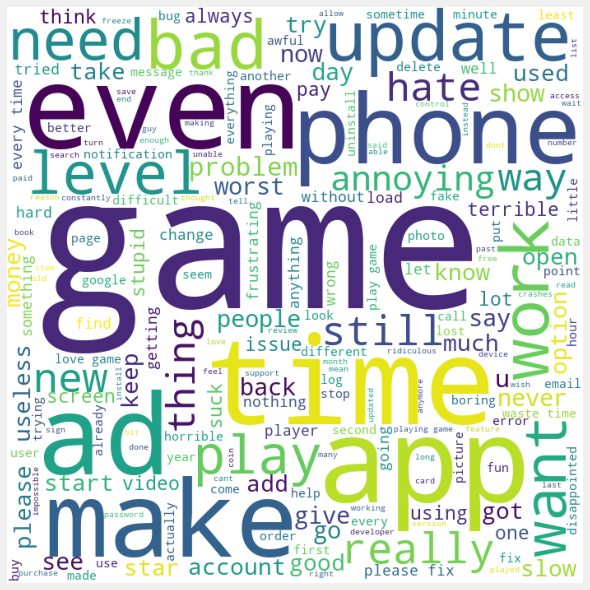

In [54]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in negative_reviews_df.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

We observed the sentiment subjectivity is not always proportional to the sentiment polarity but in maximum number of case,shows a proportional behavior.

Using the sentiment data we observed that reviews play a major role in app development process.It not only help the developer to know the shortcoming in the app so that the developer can provide a great user experience.

# **Conclusion**
* The smaller apps have more audience and hence app development companies must focus on small but feature rich apps.

*	It is better to develop apps that have support of older versions of devices as well.

*	Developer should focus on developing apps which are rated PG 12+, as that category has the maximum installs. The social,
communications and tools have the maximum installs.

* The negative feedbacks directly impact the number of installs by the users, hence developer need to keep a eye to on the user reviews and feedbacks.
